In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pre-processing

In [2]:
df_bitcoin = pd.read_csv("../data/bitcoin.csv", na_values=["null", ""], keep_default_na=True, index_col=0, parse_dates=["date"])
df_rates = pd.read_csv("../data/FEDFUNDS.csv", parse_dates=["observation_date"])
df_gold = pd.read_csv("../data/gold_5min.csv", sep=";", parse_dates=["Date"])

In [3]:
df_bitcoin.columns.values

array(['date', 'active_addresses', 'tweets', 'top_100_percent',
       'difficulty', 'transactions', 'av_transaction_size', 'market_cap',
       'confirmation_time', 'median_transaction_value', 'send_usd',
       'google_trends', 'block_size', 'mining_profitability', 'hashrate',
       'sent_addresses', 'median_transaction_size', 'fee_reward',
       'av_transaction_value', 'full_name', 'coin'], dtype=object)

In [4]:
df_rates.columns.values

array(['observation_date', 'FEDFUNDS'], dtype=object)

In [5]:
df_gold.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [6]:
df_gold.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [7]:
df_bitcoin.dtypes

date                        datetime64[ns]
active_addresses                   float64
tweets                             float64
top_100_percent                    float64
difficulty                         float64
transactions                       float64
av_transaction_size                float64
market_cap                         float64
confirmation_time                  float64
median_transaction_value           float64
send_usd                           float64
google_trends                      float64
block_size                         float64
mining_profitability               float64
hashrate                           float64
sent_addresses                     float64
median_transaction_size            float64
fee_reward                         float64
av_transaction_value               float64
full_name                           object
coin                                object
dtype: object

In [8]:
df_rates.dtypes

observation_date    datetime64[ns]
FEDFUNDS                   float64
dtype: object

In [9]:
df_bitcoin.shape

(4378, 21)

In [10]:
df_rates.shape

(121, 2)

In [11]:
df_bitcoin.isna().sum()

date                           0
active_addresses              27
tweets                      1978
top_100_percent               12
difficulty                     6
transactions                 261
av_transaction_size         4378
market_cap                   561
confirmation_time              8
median_transaction_value     561
send_usd                     561
google_trends                570
block_size                     6
mining_profitability         561
hashrate                       7
sent_addresses                 8
median_transaction_size     1205
fee_reward                   641
av_transaction_value         561
full_name                      0
coin                           0
dtype: int64

In [12]:
df_bitcoin.columns.values

array(['date', 'active_addresses', 'tweets', 'top_100_percent',
       'difficulty', 'transactions', 'av_transaction_size', 'market_cap',
       'confirmation_time', 'median_transaction_value', 'send_usd',
       'google_trends', 'block_size', 'mining_profitability', 'hashrate',
       'sent_addresses', 'median_transaction_size', 'fee_reward',
       'av_transaction_value', 'full_name', 'coin'], dtype=object)

In [13]:
df_bitcoin.count()

date                        4378
active_addresses            4351
tweets                      2400
top_100_percent             4366
difficulty                  4372
transactions                4117
av_transaction_size            0
market_cap                  3817
confirmation_time           4370
median_transaction_value    3817
send_usd                    3817
google_trends               3808
block_size                  4372
mining_profitability        3817
hashrate                    4371
sent_addresses              4370
median_transaction_size     3173
fee_reward                  3737
av_transaction_value        3817
full_name                   4378
coin                        4378
dtype: int64

In [14]:
df_bitcoin.shape

(4378, 21)

In [15]:
df_bitcoin = df_bitcoin.sort_values('date').reset_index(drop=True)
df_bitcoin['tweets'] = df_bitcoin['tweets'].fillna(0)
df_bitcoin['google_trends'] = df_bitcoin['google_trends'].fillna(0)
start = max(df_bitcoin['date'].min(), df_rates['observation_date'].min(), df_gold['Date'].min())
end   = min(df_bitcoin['date'].max(), df_rates['observation_date'].max(), df_gold['Date'].max())
daily_range = pd.date_range(start, end, freq='D')

df_rates = df_rates.sort_values('observation_date').reset_index(drop=True)
df_rates = df_rates.rename(columns={'observation_date': 'date'})

In [16]:
# 🔧 COMPREHENSIVE DATA CLEANING
print("🔍 BEFORE DATA CLEANING:")
print(f"  Shape: {df_bitcoin.shape}")
print(f"  Columns: {len(df_bitcoin.columns)}")

# Check for columns with quality issues
print(f"\n📊 DATA QUALITY ANALYSIS:")

# Check if av_transaction_size exists and analyze it
if 'av_transaction_size' in df_bitcoin.columns:
    missing_pct = df_bitcoin['av_transaction_size'].isna().sum() / len(df_bitcoin) * 100
    print(f"  av_transaction_size missing: {df_bitcoin['av_transaction_size'].isna().sum()} / {len(df_bitcoin)} ({missing_pct:.1f}%)")
else:
    print(f"  av_transaction_size: Already removed or not present")

# Define columns to remove for data quality reasons
columns_to_remove = []

# 1. Remove completely missing columns (100% missing values)
if 'av_transaction_size' in df_bitcoin.columns:
    if df_bitcoin['av_transaction_size'].isna().sum() == len(df_bitcoin):
        columns_to_remove.append('av_transaction_size')
        print(f"  ❌ av_transaction_size: 100% missing - will be removed")

# 2. Remove non-informative categorical columns
non_informative_cols = ['full_name', 'coin']
for col in non_informative_cols:
    if col in df_bitcoin.columns:
        columns_to_remove.append(col)
        print(f"  ❌ {col}: Non-informative categorical - will be removed")
    else:
        print(f"  ✅ {col}: Already removed or not present")

# 3. Remove problematic columns (quality issues)
if 'confirmation_time' in df_bitcoin.columns:
    columns_to_remove.append('confirmation_time')
    print(f"  ❌ confirmation_time: May have quality issues - will be removed")
else:
    print(f"  ✅ confirmation_time: Already removed or not present")

# Apply all removals at once
if columns_to_remove:
    df_bitcoin = df_bitcoin.drop(columns=columns_to_remove)
    print(f"\n✅ REMOVED COLUMNS: {columns_to_remove}")
else:
    print(f"\n✅ No problematic columns found to remove")

print(f"\n🎯 AFTER DATA CLEANING:")
print(f"  Shape: {df_bitcoin.shape}")
print(f"  Columns: {len(df_bitcoin.columns)}")
print(f"  Columns removed: {len(columns_to_remove)}")
print(f"  ✅ Dataset cleaned and ready for processing")

🔍 BEFORE DATA CLEANING:
  Shape: (4378, 21)
  Columns: 21

📊 DATA QUALITY ANALYSIS:
  av_transaction_size missing: 4378 / 4378 (100.0%)
  ❌ av_transaction_size: 100% missing - will be removed
  ❌ full_name: Non-informative categorical - will be removed
  ❌ coin: Non-informative categorical - will be removed
  ❌ confirmation_time: May have quality issues - will be removed

✅ REMOVED COLUMNS: ['av_transaction_size', 'full_name', 'coin', 'confirmation_time']

🎯 AFTER DATA CLEANING:
  Shape: (4378, 17)
  Columns: 17
  Columns removed: 4
  ✅ Dataset cleaned and ready for processing


In [17]:
target_col = 'send_usd'
df_btc_daily = (
    df_bitcoin.set_index('date')
    .sort_index()
    .reindex(daily_range)
    .rename_axis('date')
)
numeric_cols = df_btc_daily.select_dtypes(include=[np.number]).columns.tolist()
feature_cols_to_ffill = [c for c in numeric_cols if c != target_col]
df_btc_daily[feature_cols_to_ffill] = df_btc_daily[feature_cols_to_ffill].ffill()

In [18]:
df_rates_daily = df_rates.set_index('date').sort_index()
df_rates_daily = df_rates_daily.reindex(daily_range).rename_axis('date')
df_rates_daily['FEDFUNDS'] = df_rates_daily['FEDFUNDS'].ffill()

In [19]:
# 🥇 GOLD DATA PROCESSING WITH MISSING VALUE HANDLING
print("🔍 GOLD DATA PROCESSING:")
print(f"Original gold data shape: {df_gold.shape}")

df_gold = df_gold.dropna(subset=['Date']).sort_values('Date')

df_gold_daily = (
    df_gold
    .set_index('Date')
    .resample('D')
    .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
)

df_gold_daily = df_gold_daily.reindex(daily_range).rename_axis('date')

# Handle missing values in gold prices with interpolation
price_cols = ['Open', 'High', 'Low', 'Close']

print(f"Missing values before interpolation:")
for col in price_cols:
    missing_count = df_gold_daily[col].isna().sum()
    print(f"  {col}: {missing_count} missing values")

# Use forward fill first, then backward fill for any remaining NaN
df_gold_daily[price_cols] = df_gold_daily[price_cols].ffill().bfill()

# For any remaining missing values, use interpolation
df_gold_daily[price_cols] = df_gold_daily[price_cols].interpolate(method='linear')

print(f"\nMissing values after cleaning:")
for col in price_cols:
    missing_count = df_gold_daily[col].isna().sum()
    status = "✅" if missing_count == 0 else "❌"
    print(f"  {col}: {missing_count} missing values {status}")

# Handle volume separately (fill with 0 for missing days)
df_gold_daily['Volume'] = df_gold_daily['Volume'].fillna(0)

# Rename columns to be more descriptive
df_gold_daily = df_gold_daily.rename(columns={
    'Open': 'gold_open',
    'High': 'gold_high',
    'Low': 'gold_low',
    'Close': 'gold_close',
    'Volume': 'gold_volume'
})

print(f"✅ Gold data processed successfully")
print(f"Final gold data shape: {df_gold_daily.shape}")

🔍 GOLD DATA PROCESSING:
Original gold data shape: (1413022, 6)
Missing values before interpolation:
  Open: 582 missing values
  High: 582 missing values
  Low: 582 missing values
  Close: 582 missing values

Missing values after cleaning:
  Open: 0 missing values ✅
  High: 0 missing values ✅
  Low: 0 missing values ✅
  Close: 0 missing values ✅
✅ Gold data processed successfully
Final gold data shape: (1977, 5)


In [20]:
df_merged = df_btc_daily.join([df_rates_daily['FEDFUNDS'], df_gold_daily])

In [21]:
df_merged[target_col] = pd.to_numeric(df_merged[target_col], errors='coerce')
df_merged = df_merged[(df_merged[target_col].notna()) & (df_merged[target_col] > 0)]

In [22]:
df_merged.shape

(1976, 22)

In [23]:
df_merged.columns.values

array(['active_addresses', 'tweets', 'top_100_percent', 'difficulty',
       'transactions', 'market_cap', 'median_transaction_value',
       'send_usd', 'google_trends', 'block_size', 'mining_profitability',
       'hashrate', 'sent_addresses', 'median_transaction_size',
       'fee_reward', 'av_transaction_value', 'FEDFUNDS', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'gold_volume'], dtype=object)

In [24]:
df_merged.isna().sum()

active_addresses            0
tweets                      0
top_100_percent             0
difficulty                  0
transactions                0
market_cap                  0
median_transaction_value    0
send_usd                    0
google_trends               0
block_size                  0
mining_profitability        0
hashrate                    0
sent_addresses              0
median_transaction_size     0
fee_reward                  0
av_transaction_value        0
FEDFUNDS                    0
gold_open                   0
gold_high                   0
gold_low                    0
gold_close                  0
gold_volume                 0
dtype: int64

Ranges por dataset:
        dataset               start                 end  days    rows
       gold_raw 2004-06-11 07:15:00 2025-07-15 19:45:00  7705 1413022
    bitcoin_raw 2009-01-03 00:00:00 2020-12-28 00:00:00  4378    4378
      rates_raw 2015-08-01 00:00:00 2025-08-01 00:00:00  3654     121
  btc_daily_idx 2015-08-01 00:00:00 2020-12-28 00:00:00  1977    1977
rates_daily_idx 2015-08-01 00:00:00 2020-12-28 00:00:00  1977    1977
 gold_daily_idx 2015-08-01 00:00:00 2020-12-28 00:00:00  1977    1977
     merged_idx 2015-08-01 00:00:00 2020-12-27 00:00:00  1976    1976

Cobertura FEDFUNDS (dados mensais originais):
  FEDFUNDS começa em: 2015-08-01  | termina em: 2025-08-01

No merge: 0 NaNs em FEDFUNDS de 1976 linhas
  NaNs antes do primeiro FEDFUNDS: 0
  NaNs após o último FEDFUNDS:    0


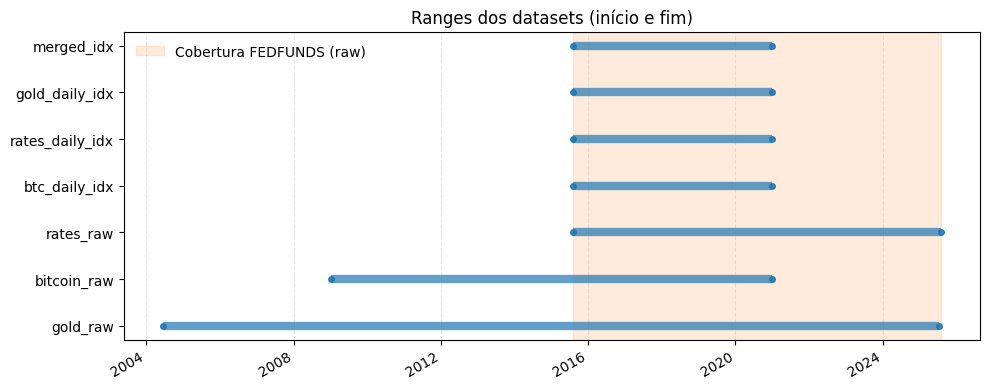

In [25]:
# python
def _col_or(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"Nenhuma das colunas {candidates} foi encontrada em {list(df.columns)}")

btc_date_col = _col_or(df_bitcoin, ['date'])
rates_date_col = _col_or(df_rates, ['date', 'observation_date'])
gold_date_col = _col_or(df_gold, ['Date', 'date'])

ranges = []

def add_range(name, idx, n_rows=None):
    start, end = pd.to_datetime(idx.min()), pd.to_datetime(idx.max())
    n_days = (end.normalize() - start.normalize()).days + 1
    ranges.append((name, start, end, n_days, n_rows if n_rows is not None else len(idx)))

add_range('bitcoin_raw', df_bitcoin[btc_date_col], len(df_bitcoin))
add_range('rates_raw', df_rates[rates_date_col], len(df_rates))
add_range('gold_raw', df_gold[gold_date_col], len(df_gold))

add_range('btc_daily_idx', df_btc_daily.index)
add_range('rates_daily_idx', df_rates_daily.index)
add_range('gold_daily_idx', df_gold_daily.index)
add_range('merged_idx', df_merged.index, len(df_merged))

ranges_df = pd.DataFrame(ranges, columns=['dataset', 'start', 'end', 'days', 'rows']).sort_values('start')
print("Ranges por dataset:")
print(ranges_df.to_string(index=False))

first_rate = pd.to_datetime(df_rates[rates_date_col].min())
last_rate  = pd.to_datetime(df_rates[rates_date_col].max())
print("\nCobertura FEDFUNDS (dados mensais originais):")
print(f"  FEDFUNDS começa em: {first_rate.date()}  | termina em: {last_rate.date()}")

n_total = len(df_merged)
n_nan = df_merged['FEDFUNDS'].isna().sum()
print(f"\nNo merge: {n_nan} NaNs em FEDFUNDS de {n_total} linhas")

mask_before = (df_merged.index < first_rate) & df_merged['FEDFUNDS'].isna()
mask_after  = (df_merged.index > last_rate) & df_merged['FEDFUNDS'].isna()
print(f"  NaNs antes do primeiro FEDFUNDS: {mask_before.sum()}")
print(f"  NaNs após o último FEDFUNDS:    {mask_after.sum()}")

fig, ax = plt.subplots(figsize=(10, 0.5 + 0.5*len(ranges_df)))
ypos = np.arange(len(ranges_df))
ax.set_yticks(ypos)
ax.set_yticklabels(ranges_df['dataset'])

for i, row in enumerate(ranges_df.itertuples(index=False)):
    ax.hlines(y=i, xmin=row.start, xmax=row.end, color='tab:blue', linewidth=6, alpha=0.7)
    ax.plot([row.start, row.end], [i, i], 'o', color='tab:blue', alpha=0.9, markersize=4)

ax.axvspan(first_rate, last_rate, color='tab:orange', alpha=0.15, label='Cobertura FEDFUNDS (raw)')
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_title('Ranges dos datasets (início e fim)')
ax.legend(loc='upper left', frameon=False)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [26]:
df_merged.to_csv("../data/dataset_merged.csv", index=True, encoding="utf-8", float_format='%.2f')

## Adicionando preços do Bitcoin

Agora vamos integrar os dados de preço do Bitcoin para criar o dataset final com a coluna btc_price:

In [27]:
df_btc_price = pd.read_csv("../data/bitcoin_price.csv", parse_dates=['Date'])
df_btc_price.columns = ['date', 'btc_price']
df_btc_price = df_btc_price.set_index('date')

print(f"Shape: {df_btc_price.shape}")
print(f"Range: {df_btc_price.index.min()} to {df_btc_price.index.max()}")
print(df_btc_price.head())

Shape: (5541, 1)
Range: 2010-07-17 00:00:00 to 2025-09-16 00:00:00
            btc_price
date                 
2010-07-17     0.0495
2010-07-18     0.0726
2010-07-19     0.0859
2010-07-20     0.0783
2010-07-21     0.0767


In [28]:
df_btc_price_daily = df_btc_price.reindex(daily_range)
print(f"Shape after reindex: {df_btc_price_daily.shape}")

# overlap
overlap_start = max(df_merged.index.min(), df_btc_price_daily.index.min())
overlap_end = min(df_merged.index.max(), df_btc_price_daily.index.max())
print(f"\nOverlap: {overlap_start} a {overlap_end}")

Shape after reindex: (1977, 1)

Overlap: 2015-08-01 00:00:00 a 2020-12-27 00:00:00


In [29]:
#merge with original dataset
df_merged_with_price = df_merged.join(df_btc_price_daily['btc_price'], how='inner')

print(f"Shape of original dataset: {df_merged.shape}")
print(f"Shape of dataset with prices: {df_merged_with_price.shape}")
print(f"Added columns: {set(df_merged_with_price.columns) - set(df_merged.columns)}")

# Check for missing values in the btc_price column
print(f"\nMissing values in btc_price: {df_merged_with_price['btc_price'].isna().sum()}")
print(f"Final data period: {df_merged_with_price.index.min()} to {df_merged_with_price.index.max()}")

Shape of original dataset: (1976, 22)
Shape of dataset with prices: (1976, 23)
Added columns: {'btc_price'}

Missing values in btc_price: 0
Final data period: 2015-08-01 00:00:00 to 2020-12-27 00:00:00


## Final Dataset Quality Control

Let's perform comprehensive quality checks on our final dataset to ensure it's ready for machine learning models:

In [30]:
# 🔍 COMPREHENSIVE DATASET QUALITY CONTROL
print("🎯 FINAL DATASET QUALITY ASSESSMENT")
print("=" * 60)

print(f"📊 BASIC INFORMATION:")
print(f"  Shape: {df_merged_with_price.shape}")
print(f"  Date range: {df_merged_with_price.index.min().date()} to {df_merged_with_price.index.max().date()}")
print(f"  Total days: {(df_merged_with_price.index.max() - df_merged_with_price.index.min()).days}")

print(f"\n🔍 MISSING VALUES ANALYSIS:")
missing_values = df_merged_with_price.isnull().sum()
missing_percentage = (missing_values / len(df_merged_with_price)) * 100

has_missing = missing_values[missing_values > 0]
if len(has_missing) == 0:
    print("  ✅ No missing values found!")
else:
    print("  Missing values found:")
    for col, count in has_missing.items():
        pct = missing_percentage[col]
        status = "✅ Acceptable" if pct < 1 else "⚠️ Warning" if pct < 5 else "❌ Critical"
        print(f"    {col:20}: {count:4d} ({pct:5.1f}%) {status}")

print(f"\n🔍 DATA TYPES ANALYSIS:")
numeric_cols = df_merged_with_price.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df_merged_with_price.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Non-numeric columns: {len(non_numeric_cols)}")
if non_numeric_cols:
    print(f"  ❌ Non-numeric columns found: {non_numeric_cols}")
    print(f"     These should be removed or encoded before ML model training")
else:
    print(f"  ✅ All columns are numeric - ready for ML models")

print(f"\n🎯 TARGET VARIABLE CHECK:")
if 'btc_price' in df_merged_with_price.columns:
    target_missing = df_merged_with_price['btc_price'].isna().sum()
    print(f"  Target variable: btc_price")
    print(f"  Missing values: {target_missing}")
    print(f"  Price range: ${df_merged_with_price['btc_price'].min():,.2f} - ${df_merged_with_price['btc_price'].max():,.2f}")
    print(f"  Price volatility: {df_merged_with_price['btc_price'].max()/df_merged_with_price['btc_price'].min():.2f}x")
    print(f"  ✅ Target variable is complete and ready for modeling")

print(f"\n🔍 TIME SERIES CONTINUITY:")
date_diff = df_merged_with_price.index.to_series().diff()
gaps = (date_diff > pd.Timedelta(days=1)).sum()
duplicates = df_merged_with_price.index.duplicated().sum()

print(f"  Date gaps: {gaps}")
print(f"  Duplicate dates: {duplicates}")
if gaps == 0 and duplicates == 0:
    print(f"  ✅ Perfect time series continuity")
else:
    if gaps > 0:
        print(f"  ⚠️ {gaps} gaps found in time series")
    if duplicates > 0:
        print(f"  ❌ {duplicates} duplicate dates found")

print(f"\n🏆 DATASET READINESS SUMMARY:")
issues = []
if len(has_missing) > 0:
    issues.append(f"{len(has_missing)} columns with missing values")
if len(non_numeric_cols) > 0:
    issues.append(f"{len(non_numeric_cols)} non-numeric columns")
if gaps > 0:
    issues.append(f"{gaps} time series gaps")
if duplicates > 0:
    issues.append(f"{duplicates} duplicate dates")

if len(issues) == 0:
    print(f"  ✅ PERFECT: Dataset is fully ready for machine learning!")
    readiness_score = 100
else:
    print(f"  ⚠️ ISSUES FOUND: {', '.join(issues)}")
    # Calculate readiness score
    readiness_score = max(50, 100 - len(issues) * 10 - (len(has_missing) * 5) - (len(non_numeric_cols) * 15))

print(f"  📊 Dataset Readiness Score: {readiness_score}/100")

if readiness_score >= 90:
    print(f"  🌟 Excellent - Ready for production ML models")
elif readiness_score >= 75:
    print(f"  ✅ Good - Minor cleanup may be beneficial")
elif readiness_score >= 50:
    print(f"  ⚠️ Fair - Some issues need attention")
else:
    print(f"  ❌ Poor - Significant cleanup required")

🎯 FINAL DATASET QUALITY ASSESSMENT
📊 BASIC INFORMATION:
  Shape: (1976, 23)
  Date range: 2015-08-01 to 2020-12-27
  Total days: 1975

🔍 MISSING VALUES ANALYSIS:
  ✅ No missing values found!

🔍 DATA TYPES ANALYSIS:
  Numeric columns: 23
  Non-numeric columns: 0
  ✅ All columns are numeric - ready for ML models

🎯 TARGET VARIABLE CHECK:
  Target variable: btc_price
  Missing values: 0
  Price range: $213.67 - $27,061.00
  Price volatility: 126.65x
  ✅ Target variable is complete and ready for modeling

🔍 TIME SERIES CONTINUITY:
  Date gaps: 0
  Duplicate dates: 0
  ✅ Perfect time series continuity

🏆 DATASET READINESS SUMMARY:
  ✅ PERFECT: Dataset is fully ready for machine learning!
  📊 Dataset Readiness Score: 100/100
  🌟 Excellent - Ready for production ML models


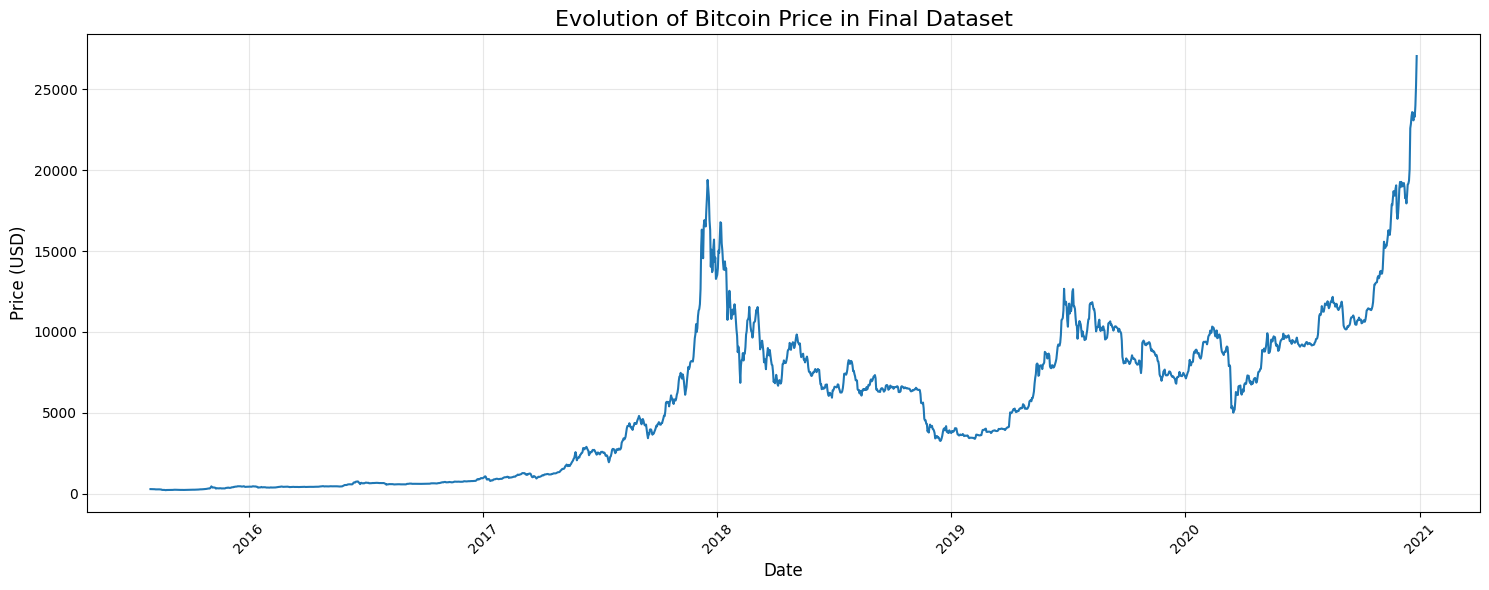


Statistics of btc_price:
count     1976.000000
mean      5617.379025
std       4675.419183
min        213.673000
25%        766.109750
50%       5678.500000
75%       8925.500000
max      27061.000000
Name: btc_price, dtype: float64


In [31]:
# Visualization of btc_price
plt.figure(figsize=(15, 6))
plt.plot(df_merged_with_price.index, df_merged_with_price['btc_price'], linewidth=1.5)
plt.title('Evolution of Bitcoin Price in Final Dataset', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistics of btc_price
print("\nStatistics of btc_price:")
print(df_merged_with_price['btc_price'].describe())

In [32]:
df_merged.describe(include="all")

,active_addresses,tweets,top_100_percent,difficulty,transactions,market_cap,median_transaction_value,send_usd,google_trends,block_size,...,sent_addresses,median_transaction_size,fee_reward,av_transaction_value,FEDFUNDS,gold_open,gold_high,gold_low,gold_close,gold_volume
count,1.976000e+03,1976.000000,1976.00000,1.976000e+03,1976.000000,1.976000e+03,1976.000000,1.976000e+03,1976.000000,1976.000000,...,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,5.843168e+05,32678.095648,17.27676,5.810740e+12,263987.419534,9.907483e+10,382.409709,9.073012e+09,42.967605,788538.372976,...,380094.962045,1.184452,5.105907,31832.918522,1.076447,1365.004271,1374.116144,1356.482257,1365.617885,69481.106781
std,1.674547e+05,19650.751882,2.06081,6.229650e+12,66087.140860,8.470372e+10,508.210073,1.186011e+10,48.291623,144500.426595,...,93975.149229,2.927201,5.853568,37712.731629,0.814899,220.329595,222.951078,217.473930,220.447086,57573.239182
min,1.133370e+05,0.000000,13.19900,5.227830e+10,89360.000000,3.075433e+09,0.091700,1.761133e+08,0.000000,350327.000000,...,153077.000000,0.009970,0.457000,1166.000000,0.050000,1050.920000,1063.460000,1046.230000,1051.550000,0.000000
25%,4.632572e+05,20592.000000,15.19175,2.867658e+11,215575.000000,1.226913e+10,151.822000,1.906453e+09,13.641000,692456.500000,...,310067.250000,0.101000,1.186000,7661.750000,0.370000,1231.432500,1237.832500,1224.360000,1232.295000,0.000000
50%,5.747140e+05,27169.500000,18.04800,3.817753e+12,268454.000000,9.743264e+10,269.900500,6.104110e+09,35.796500,812018.000000,...,377963.500000,0.257000,2.506000,22874.000000,1.040000,1289.440000,1295.760000,1282.595000,1290.460000,72045.000000
75%,6.851215e+05,37816.750000,19.03850,1.018349e+13,315114.250000,1.593126e+11,454.156500,1.019563e+10,49.289000,902989.000000,...,439272.750000,1.130250,7.157750,37737.500000,1.820000,1464.212500,1471.700000,1456.407500,1462.652500,107636.000000
max,1.133157e+06,155600.000000,21.17600,1.999734e+13,490459.000000,5.028765e+11,5417.000000,2.506494e+11,616.867000,998092.000000,...,730199.000000,34.095000,43.580000,812025.000000,2.420000,2066.550000,2074.870000,2034.440000,2063.250000,352486.000000


In [33]:
# 💾 SAVE FINAL PROCESSED DATASET
print("💾 SAVING FINAL PROCESSED DATASET...")

# Save the complete dataset with Bitcoin prices
output_file = "../data/dataset_merged_with_price.csv"
df_merged_with_price.to_csv(output_file, index=True, encoding="utf-8", float_format='%.6f')

print(f"✅ Dataset saved successfully to: {output_file}")
print(f"📊 Final dataset statistics:")
print(f"  Shape: {df_merged_with_price.shape}")
print(f"  Columns: {len(df_merged_with_price.columns)}")
print(f"  Date range: {df_merged_with_price.index.min().date()} to {df_merged_with_price.index.max().date()}")
print(f"  Total days: {len(df_merged_with_price)}")

print(f"\n🎯 PROCESSING COMPLETE!")
print(f"📁 Final dataset available:")
print(f"  - dataset_merged.csv (without Bitcoin prices)")
print(f"  - dataset_merged_with_price.csv (complete dataset for all analyses)")

💾 SAVING FINAL PROCESSED DATASET...
✅ Dataset saved successfully to: ../data/dataset_merged_with_price.csv
📊 Final dataset statistics:
  Shape: (1976, 23)
  Columns: 23
  Date range: 2015-08-01 to 2020-12-27
  Total days: 1976

🎯 PROCESSING COMPLETE!
📁 Final dataset available:
  - dataset_merged.csv (without Bitcoin prices)
  - dataset_merged_with_price.csv (complete dataset for all analyses)
